# 연습
1. csv 폴더 안에 num_1 폴더에 있는 chipotle.tsv 로드
2. order_id컬럼의 데이터의 타입을 str 변경
3. 가장 많이 주문한 item_name을 출력
4. item당 주문 총량의 top10을 바 그래프로 표시
5. item_price의 '$'을 제거하고 데이터 타입을 float형태로 변경
6. 주문당 평균 계산 금액 출력

In [78]:
import pandas as pd

In [79]:
df = pd.read_csv("../csv/csv/num_1/chipotle.tsv", sep="\t")
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [81]:
df['order_id'] = df['order_id'].astype(str)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB


In [83]:
df_1 = df.groupby("item_name").sum()

In [84]:
df_2 = df_1.sort_values("quantity", ascending=False)
df_3 = df_2.head(10)

In [85]:
df_3

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351
Chips,230
Steak Bowl,221
Bottled Water,211
Chips and Fresh Tomato Salsa,130


<AxesSubplot:xlabel='item_name'>

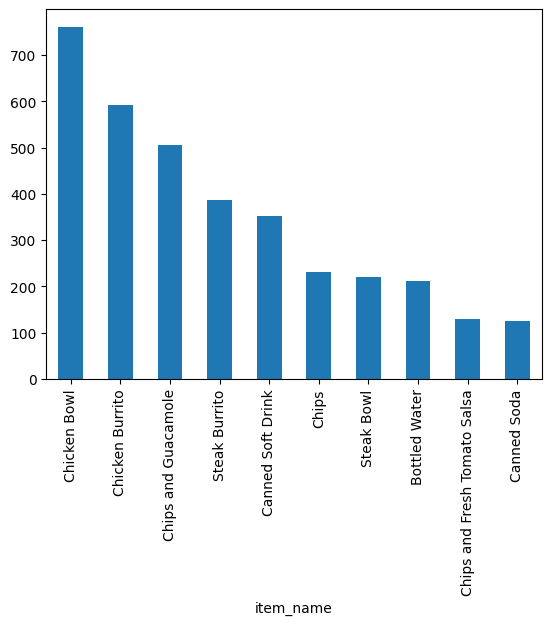

In [86]:
df_3['quantity'].plot.bar()

In [87]:
type(df_3['quantity'])

pandas.core.series.Series

<function matplotlib.pyplot.show(close=None, block=None)>

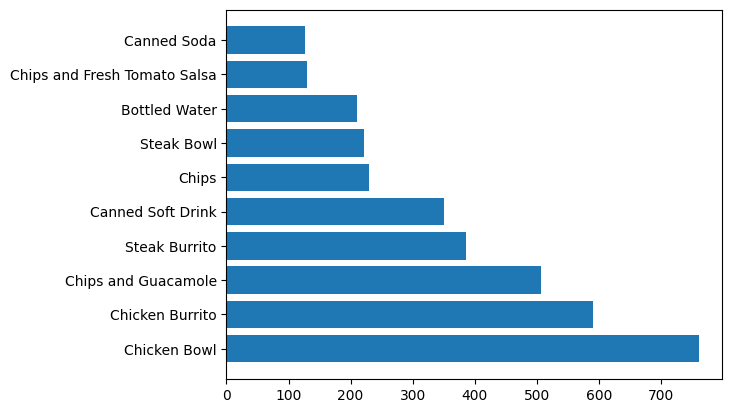

In [88]:
import matplotlib.pyplot as plt
x= df_3.index
y= df_3['quantity']

plt.barh(x,y)
plt.show

In [89]:
#df['item_price']= df['item_price'].apply(lambda x: x.replace("$",""))
#df['item_price'] = df['item_price'].str.lstrip('$')

def change(x):
    x = x.replace("$","")
    return x

df['item_price'] = df['item_price'].apply(change)

In [90]:
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [91]:
df['item_price'] = df['item_price'].astype(float)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   object 
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 180.7+ KB


In [93]:
df['order_id'].value_counts()

926     23
1483    14
205     12
759     11
1786    11
        ..
768      1
341      1
1048     1
94       1
1199     1
Name: order_id, Length: 1834, dtype: int64

In [94]:
df_4 = df.groupby("order_id").sum()
df_4

,quantity,item_price
order_id,,
1,4,11.56
10,2,13.20
100,2,10.08
1000,2,20.50
1001,2,10.08
...,...,...
995,3,24.95
996,4,43.00
997,2,22.50


In [95]:
df_4['item_price'].mean()

18.811428571428568

In [96]:
df_4['mean'] = df_4['item_price']/df_4['quantity']

In [97]:
df_4['mean'].mean()

7.213102088137296

In [98]:
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [104]:
#chicken Bowl 메뉴를 2개 이상 주문한 고객들이 주문한 chicken Bowl의 평균 주문 수량
df_chi = df.loc[(df['item_name'] == 'Chicken Bowl') & (df['quantity'] >= 2 )]
#df_chi['order_id'].value_counts()
df_chi['quantity'].mean()

2.0606060606060606